## Example Code for Interval K-means

In [1]:
from interClusLib.IntervalData import IntervalData
from interClusLib.preprocessing import min_max_normalize
from interClusLib.clustering.IntervalKMeans import IntervalKMeans
from interClusLib.visualization import Interval3d, IntervalParallelCoordinates
from interClusLib.evaluation import *
from interClusLib.cluster_number_analysis import *

In [2]:
clustered_data = IntervalData.make_interval_blobs(n_clusters=3, n_dims=3, n_samples= 200)

clustered_data.summary()

Data Summary:
       Feature_1_lower  Feature_1_upper  Feature_2_lower  Feature_2_upper  \
count       200.000000       200.000000       200.000000       200.000000   
mean         -4.414384        -1.859566        -2.911386         0.061640   
std           4.549136         3.492716         6.071059         6.488680   
min         -11.190123        -7.647365       -12.742714       -11.268450   
25%          -7.803993        -4.515369       -10.228983        -7.723063   
50%          -6.644597        -3.179998        -1.671403         1.823524   
75%           0.983243         1.972131         2.896997         6.136394   
max           4.446798         5.296177         6.013769         8.792806   

       Feature_3_lower  Feature_3_upper  
count       200.000000       200.000000  
mean         -8.009675        -5.460131  
std           2.751830         2.420318  
min         -14.585529       -11.585688  
25%         -10.767496        -7.576770  
50%          -6.944806        -5.181077 

In [3]:
data = clustered_data.get_intervals()

data = min_max_normalize(data)

In [4]:
kmeans = IntervalKMeans(n_clusters=3, max_iter=1000, distance_func='euclidean', random_state=42)

kmeans.fit(data)

In [5]:
print(kmeans.centroids_)
print(kmeans.get_labels())

[[[0.18961847 0.38332838]
  [0.75818344 0.9042952 ]
  [0.57198295 0.63475407]]

 [[0.7889745  0.8455705 ]
  [0.08816877 0.19385636]
  [0.20289642 0.4332466 ]]

 [[0.26002489 0.47314908]
  [0.51770059 0.67957494]
  [0.56263521 0.79034964]]]
[1 1 1 1 0 1 0 0 2 2 1 2 1 2 0 0 1 2 0 1 0 1 1 2 2 2 0 0 0 1 0 0 1 0 0 2 1
 2 1 1 0 1 1 0 2 0 2 0 1 2 0 0 0 1 1 0 0 2 0 1 1 0 0 2 0 2 0 1 1 0 2 1 2 2
 2 2 1 2 1 1 0 2 2 1 1 2 2 1 2 0 2 1 2 0 2 0 0 2 1 0 0 0 2 1 1 1 0 1 1 2 2
 2 0 2 1 2 0 2 0 0 1 1 1 2 0 2 1 2 1 1 0 0 1 2 0 1 2 0 2 1 2 2 1 2 0 1 0 0
 2 1 2 0 2 1 2 0 1 1 0 2 1 0 0 0 1 0 0 2 0 2 1 2 1 1 0 1 0 1 1 2 2 2 2 1 2
 2 0 2 0 0 1 0 2 2 0 2 1 2 2 0]


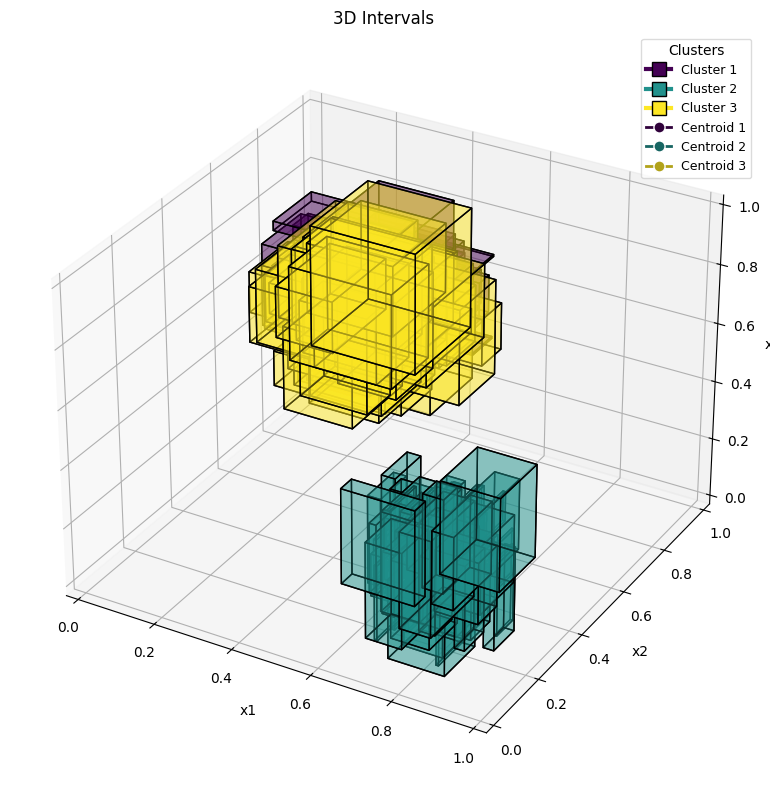

In [6]:
fig, ax = Interval3d.visualize(intervals=data, labels=kmeans.labels_, centroids=kmeans.centroids_, margin=0.01)

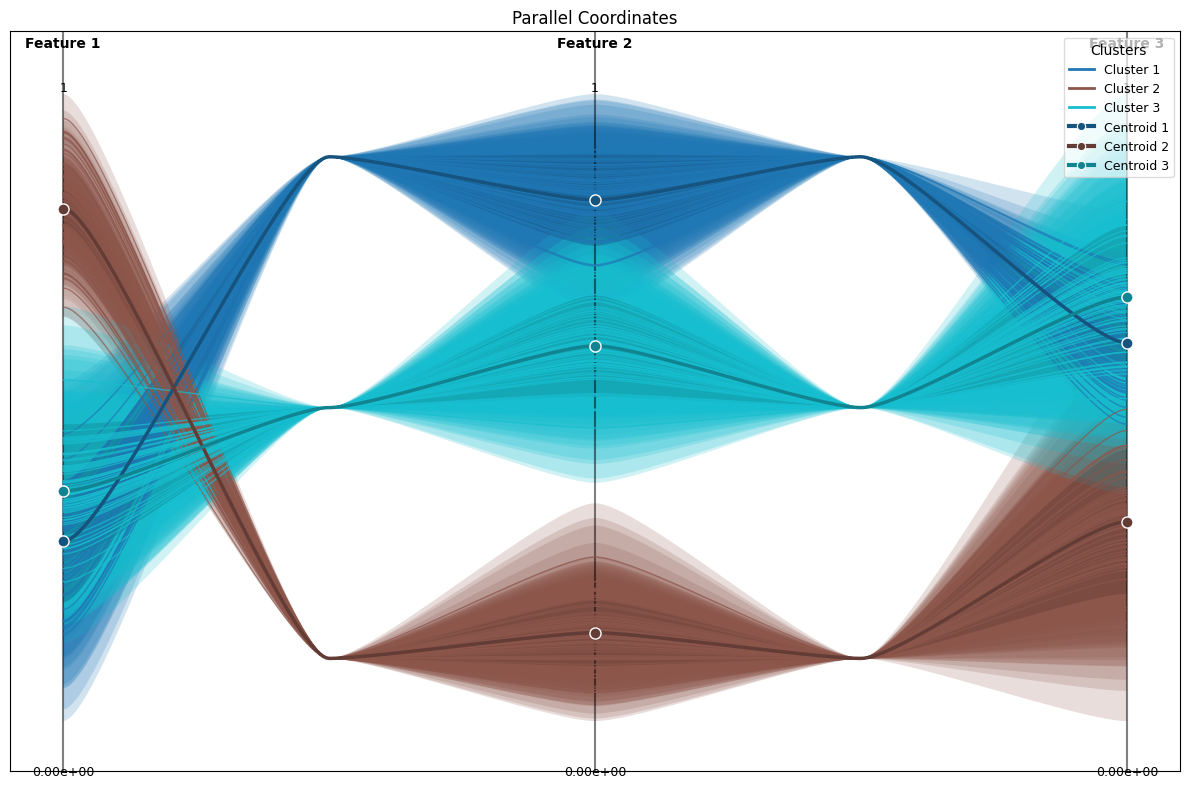

In [7]:
fig, ax = IntervalParallelCoordinates.visualize(intervals=data, labels=kmeans.labels_, centroids=kmeans.centroids_, beta= 1)

In [8]:
metric_results = kmeans.compute_metrics_for_k_range(
    data,
    min_clusters=2,
    max_clusters=10,
    metrics=['distortion', 'silhouette', 'davies_bouldin','calinski_harabasz','dunn'],
)

print(metric_results)

{'distortion': {2: 0.05018293466698487, 3: 0.04823783934755533, 4: 0.04675002805373267, 5: 0.022353087221923716, 6: 0.020778805874024413, 7: 0.02021950012954725, 8: 0.018591720758140532, 9: 0.016399778917637328, 10: 0.01559944547928028}, 'silhouette': {2: 0.7533222979612472, 3: 0.5447540564994078, 4: 0.536496203941952, 5: 0.3990808496700996, 6: 0.2646188597356511, 7: 0.25670883468546796, 8: 0.2795444176927028, 9: 0.2000570741168525, 10: 0.20388357754586806}, 'davies_bouldin': {2: 0.338011905009277, 3: 1.296472192233152, 4: 1.1198127419494526, 5: 1.1466361224268824, 6: 1.513594063847061, 7: 1.5676988044484463, 8: 1.4128164196455766, 9: 1.5469506342984733, 10: 1.4709020351100914}, 'calinski_harabasz': {2: 1189.199129867467, 3: 619.4233126930573, 4: 426.0072230314613, 5: 718.0229432648318, 6: 617.709193773963, 7: 527.1597308194204, 8: 491.2678758126784, 9: 487.96598588738976, 10: 454.6967394799366}, 'dunn': {2: 0.9191483113578615, 3: 0.06336446957758868, 4: 0.10866498145960231, 5: 0.13353

L Method optimal k: 4
Elbow Method optimal k: 5


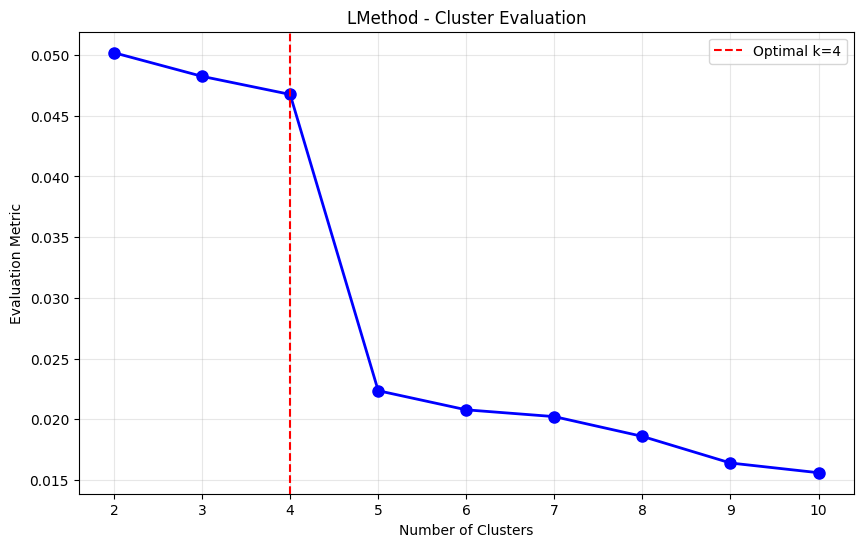

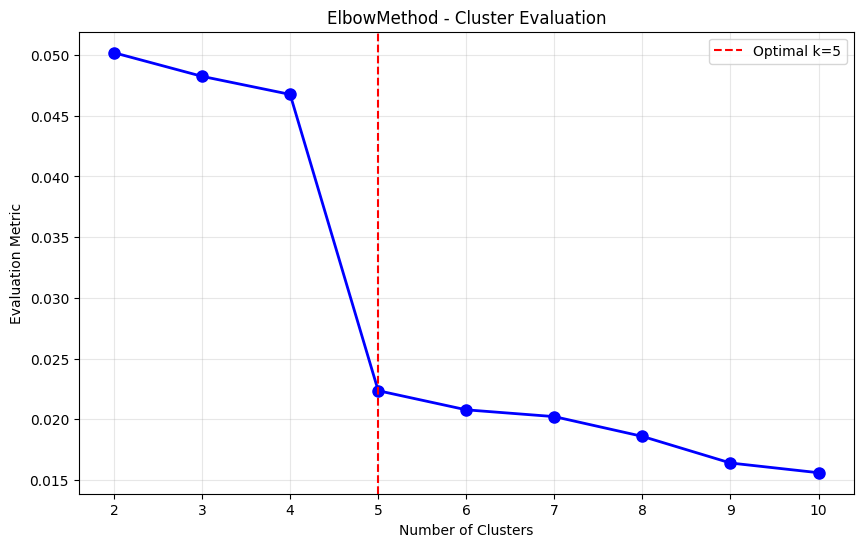

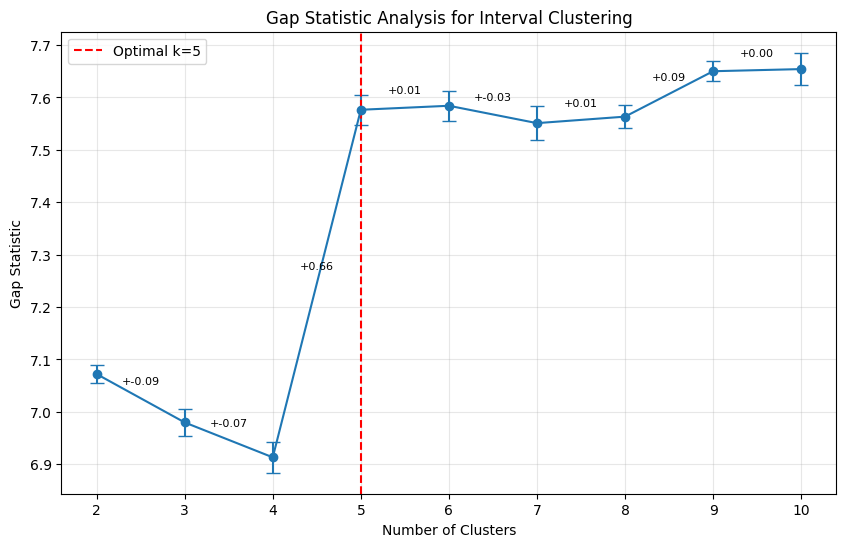

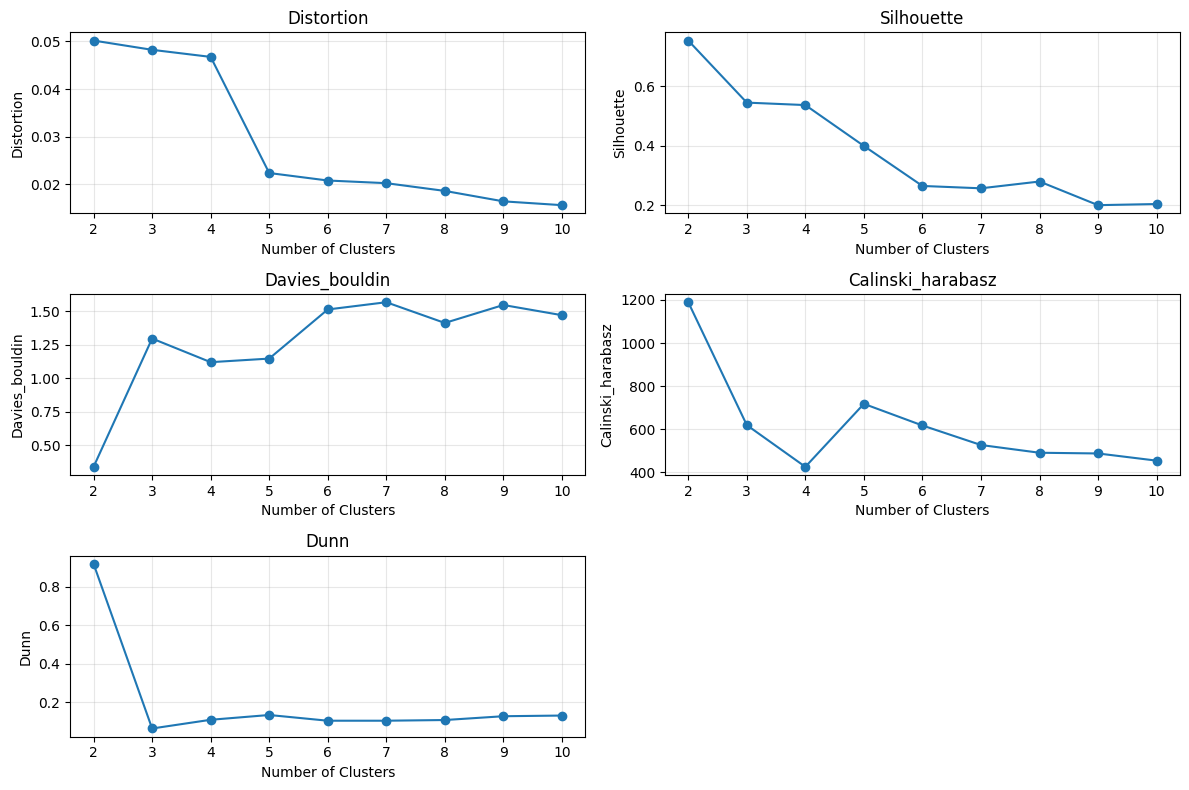

In [9]:
# 使用L方法确定最佳聚类数
l_method = LMethod(min_clusters=2, max_clusters=10)
optimal_k_l = l_method.evaluate(metric_results['distortion'])
plt = l_method.plot()
print(f"L Method optimal k: {optimal_k_l}")

# 使用肘部法则确定最佳聚类数
elbow = ElbowMethod(min_clusters=2, max_clusters=10, second_derivative= True)
optimal_k_elbow = elbow.evaluate(metric_results['distortion'])
print(f"Elbow Method optimal k: {optimal_k_elbow}")
plt = elbow.plot()

def cluster(intervals, k):
    return kmeans.cluster_and_return(intervals, k)

# 初始化 GapStatistic
gap_evaluator = GapStatistic(min_clusters=2, max_clusters=15, n_refs=10)

# 使用 GapStatistic 确定最佳聚类数
optimal_k = gap_evaluator.evaluate(
    eval_data=metric_results['distortion'],
    raw_data=data,
    cluster_func=cluster
)

# 可视化结果
gap_evaluator.plot_gap()
plt.title("Gap Statistic Analysis for Interval Clustering")
plt.show()

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
for i, (metric_name, values) in enumerate(metric_results.items(), 1):
    plt.subplot(3, 2, i)
    x = list(values.keys())
    y = list(values.values())
    plt.plot(x, y, 'o-')
    plt.title(f"{metric_name.capitalize()}")
    plt.xlabel("Number of Clusters")
    plt.ylabel(metric_name.capitalize())
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()